<a href="https://colab.research.google.com/github/Lolo-17/DS-Unit-2-Linear-Models/blob/master/module1-regression-1/LS_DS_211_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 2, Sprint 1, Module 1*

---

# Regression 1

## Assignment

You'll use another **New York City** real estate dataset. 

But now you'll **predict how much it costs to rent an apartment**, instead of how much it costs to buy a condo.

The data comes from renthop.com, an apartment listing website.

- [ ] Look at the data. Choose a feature, and plot its relationship with the target.
- [ ] Use scikit-learn for linear regression with one feature. You can follow the [5-step process from Jake VanderPlas](https://jakevdp.github.io/PythonDataScienceHandbook/05.02-introducing-scikit-learn.html#Basics-of-the-API).
- [ ] Define a function to make new predictions and explain the model coefficient.
- [ ] Organize and comment your code.

> [Do Not Copy-Paste.](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit) You must type each of these exercises in, manually. If you copy and paste, you might as well not even do them. The point of these exercises is to train your hands, your brain, and your mind in how to read, write, and see code. If you copy-paste, you are cheating yourself out of the effectiveness of the lessons.

If your **Plotly** visualizations aren't working:
- You must have JavaScript enabled in your browser
- You probably want to use Chrome or Firefox
- You may need to turn off ad blockers
- [If you're using Jupyter Lab locally, you need to install some "extensions"](https://plot.ly/python/getting-started/#jupyterlab-support-python-35)

## Stretch Goals
- [ ] Do linear regression with two or more features.
- [ ] Read [The Discovery of Statistical Regression](https://priceonomics.com/the-discovery-of-statistical-regression/)
- [ ] Read [_An Introduction to Statistical Learning_](http://faculty.marshall.usc.edu/gareth-james/ISL/ISLR%20Seventh%20Printing.pdf), Chapter 2.1: What Is Statistical Learning?

In [228]:
import sys

# If you're on Colab:
if 'google.colab' in sys.modules:
    DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Applied-Modeling/master/data/'

# If you're working locally:
else:
    DATA_PATH = '../data/'
    
# Ignore this Numpy warning when using Plotly Express:
# FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning, module='numpy')

In [229]:
# Read New York City apartment rental listing data
import pandas as pd
df = pd.read_csv(DATA_PATH+'apartments/renthop-nyc.csv')
assert df.shape == (49352, 34)

''' Changing apt with 10 br to 1 '''
df['bathrooms'] = df['bathrooms'].replace(10.0, 1)

In [230]:
# Remove outliers: 
# the most extreme 1% prices,
# the most extreme .1% latitudes, &
# the most extreme .1% longitudes
df = df[(df['price'] >= 1375) & (df['price'] <= 15500) & 
        (df['latitude'] >=40.57) & (df['latitude'] < 40.99) &
        (df['longitude'] >= -74.1) & (df['longitude'] <= -73.38)]

In [231]:
# Importing libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression

In [ ]:
# Looking at shape and first 5 rows to digest data
print(df.shape)
df.head()

In [ ]:
# To see the dataframe information.
# Primarly to check the data types of columns.
df.info()

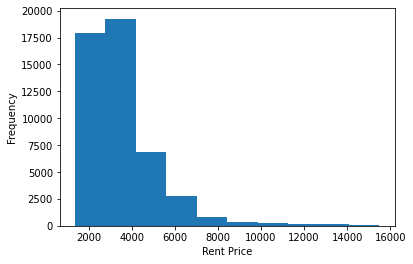

In [234]:
# To see the distribution of rent prices.
df['price'].plot(kind='hist')
plt.xlabel('Rent Price')
plt.show()

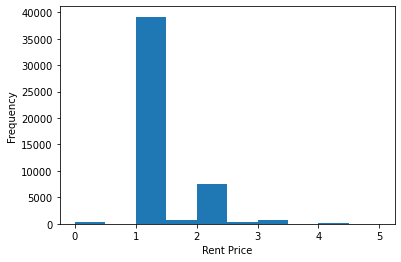

In [235]:
# To see the distribution of bathrooms.
df['bathrooms'].plot(kind='hist')
plt.xlabel('Rent Price')
plt.show()

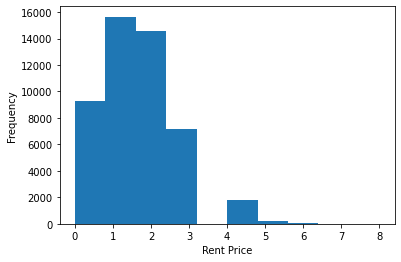

In [236]:
# To see the distribution of bathrooms.
df['bedrooms'].plot(kind='hist')
plt.xlabel('Rent Price')
plt.show()

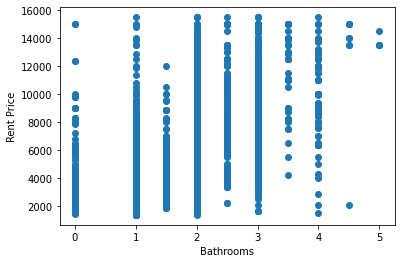

In [237]:
# To see the relationship between rent price and bathrooms.
plt.scatter(df['bathrooms'], df['price'])
plt.xlabel('Bathrooms')
plt.ylabel('Rent Price')
plt.show()

In [238]:
# This super awesome function takes two variables
# and calculates a prediction using regression.
# It also outputs stats and scatterplot with 
# best fit line.
def make_super_line(target, pred):
  y = target
  X = pd.DataFrame(pred)

  y_pred = [y.mean()] * len(y)

  model = LinearRegression()
  model.fit(X, y)

  print('STATS:')
  print('y mean:', round(y.mean()))
  print('y lenght:', len(y))
  print('mae:', round(mean_absolute_error(y, y_pred)))
  print('\n')

  y_pred = model.predict(X)

  print('FORMULA:')
  print(f'rent price = {round(model.intercept_)} + {round(model.coef_[0])} x Bathrooms \n')

  print('GRAPH:\n')
  plt.scatter(X, y)
  plt.plot(X, y_pred, color='r', label='Linear Model')
  plt.ylabel('Rent Price')
  plt.xlabel('Bathrooms')
  plt.legend()
  plt.legend(loc="best")
  plt.show()

  print('\n')
  print('RESULT:')
  print('For every additional bathroom past 1, the rent price increases by',
        round(model.intercept_)+round(model.coef_[0])*1)

STATS:
y mean: 3580
y lenght: 48818
mae: 1202.0


FORMULA:
rent price = 465.0 + 2592.0 x Bathrooms 

GRAPH:



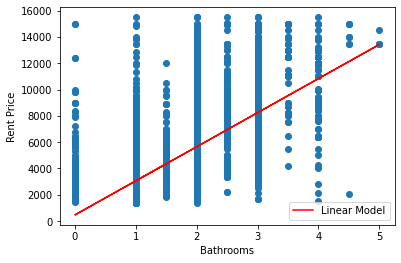



RESULT:
For every additional bathroom past 1, the rent price increases by 3057.0


In [239]:
# This is calling my super awesome function
# to get stats on bathroom agaisnt rent prices.
make_super_line(df['price'], df['bathrooms'])

In [240]:
# This small function calculates the
# predicted input number of bathroom.

# Enter bathroom number.
def find_rent_br_price(number):
  print(f'You selected {number} bathroom(s), so your rent price is, {round(model.intercept_)+round(model.coef_[0])*number}')

In [241]:
# The result shows the predicted price
# with 5 bathrooms in NYC.
find_rent_br_price(5)

You selected 5 bathroom(s), so your rent price is, 13425.0
